## Predicting Survival on Titanic

#### Our goal with this exercise is to perform a basic data analysis/exploration of the Kaggle Titanic dataset with Python, train a machine learning model on this data, and then use the model to predict who survived from a given list of passengers


### Step 1: Download the Data
#### The datasets can be downloaded from here: https://www.kaggle.com/titanic/data

### Step 2: Setup the Notebook
#### We will begin by importing all the tools, models and other dependencies we need to accomplish our task

In [1]:
%matplotlib inline

import math, datetime

# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns #!pip install may be required

# machine learning models & utilities
from sklearn.model_selection import train_test_split as tts
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# we will ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### There are three datasets provided by Kaggle - test.csv, train.csv and gender_submission.csv
#### Let's begin by loading the 'train' dataset. This is the dataset on which we perform our cleaning, analysis, visualization and training of the model

In [2]:
train = pd.read_csv('train.csv')

In [3]:
# View the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Description

#### We need to undesrtand the data we have been provided with - what it is that we are trying to predict and what data features are going to help us with the predictions

#### Here's an explanation of each column we have in the dataset:

##### PassengerId - A number assigned to each passenger. This column is not relevant for our analysis / predictions

##### Survived - 0 = No, 1 = Yes. This is the value we have to predict (Yes or No). In ML Terminology, this value is known as the 'Dependent Variable'

##### Pclass (Ticket Class) - 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class. This represents the class a passenger belonged to

##### Sex - Gender of the passenger

##### Age - Age in years

##### SibSp - Number of Siblings / Spouse aboard the Titanic

##### Parch - Number of Parents/ Children aboard the Titanic

##### Ticket - Ticket number of the passenger

##### Fare - Passenger Fare

##### Cabin - Cabin number

##### Embarked - Point from where a passenger embarked. C = Cherbourg, Q = Queenstown, S = Southampton

Check the total number of rows and columns in the dataset

In [4]:
train.shape

(891, 12)

891 rows and 12 columns

##### For columns that have numerical values, there is a way to check the statistical characteristics
###### Note: Numerical values does not mean that the column itself may be numerical. We can represent categorical values in numbers as well

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can observe the following for columns having numerical values - the total count, mean, standard deviation, minimum value, 25%, 50%, 75% and the maximum value

## EDA - Exploratory Data Analysis

#### We begin data analysis by checking if the dataset has null / missing values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### We see that the Age column has 177 null / missing values, Cabin has 687 and Embarked has 2
#### Here's a better way to visualize this

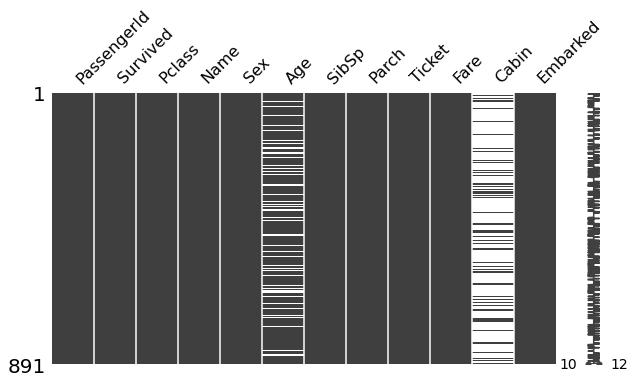

In [7]:
mns.matrix(train, figsize = (10, 5))

#### It is important to know where the null / missing values are in the dataset. This helps us identify appropriate ways to fill those values

#### Let's take a look at the dataset again

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Which of the columns are not relevant for our analysis and predictions?

##### PassengerId - Serves no purpose whatsoever for our exercise

##### Name - What impact would Name have on the survival chances of a passenger? We could perhaps analyze a bit further by separating out the 'title' from the name and evaluating it against the passengers who survived. But that would be a bit beyond scope for this exercise and so we will not consider the Name column for analysis and predictions

##### Ticket - No impact on survival, hence will not be used in this exercise

##### Cabin - No impact on survival, hence will not be used in this exercise


#### Drop these columns from the dataset

In [9]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True, axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Data Visualization

In [10]:
sns.set_style('darkgrid')
sns.set_palette('rainbow')

#### Count number of passengers from each Gender

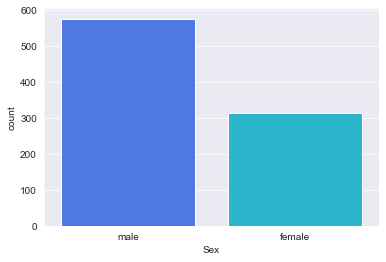

In [11]:
sns.countplot(x = 'Sex', data = train)

#### Count the number of Survivers

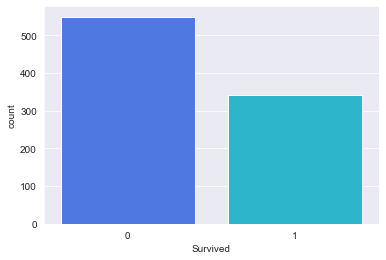

In [12]:
sns.countplot(x = 'Survived', data = train)

Around 350 passengers survived, whereas around 540 did not

#### Plot the Age Distribution

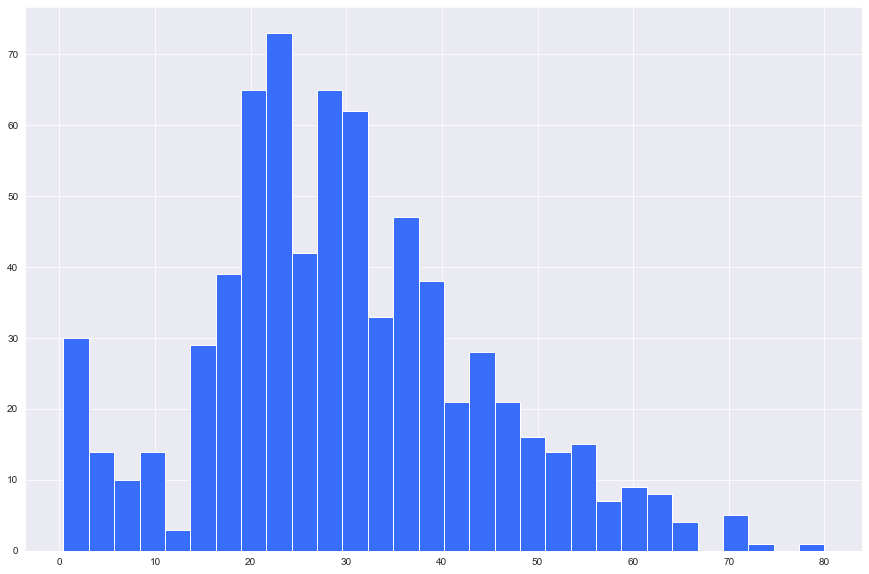

In [13]:
train.Age.hist(bins = 30, figsize = (15, 10))
plt.show()

What do we observe? Majority of the passengers were between the age group of 20 - 40

#### Visualize SibSp and Parch

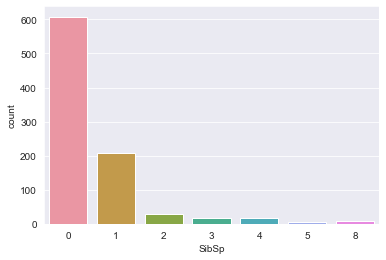

In [14]:
sns.countplot(x = 'SibSp', data = train)

#### 0 = passengers who had no siblings or spouse on board, 600 in number

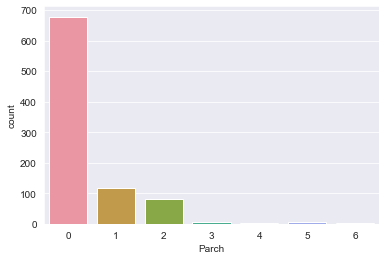

In [15]:
sns.countplot(x = 'Parch', data = train)

#### 0 = passengers who had no parents or children on board, close to 700 in number

#### Count the number of passengers from each Embark Port

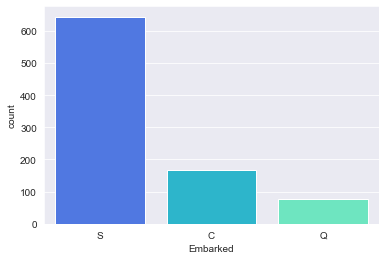

In [16]:
sns.countplot(x = 'Embarked', data = train)

#### What impact does Sex have on Survival?

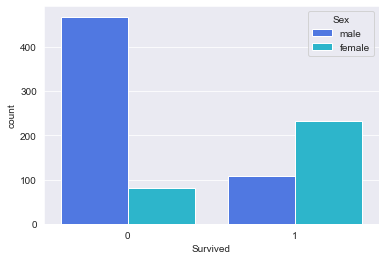

In [17]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

##### From those who did not survive, maximum were men (450+). Sex is obviously a significant factor in predicting survival (Women and Children were given preference for lifeboats)

#### What impact does Pclass have on Survival?

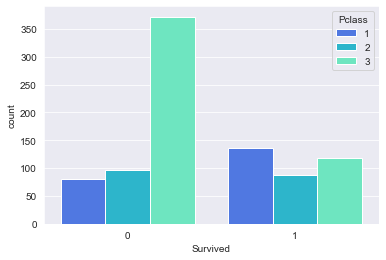

In [18]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

##### From those who did not survive, maximum were from Class 3 (360+). Passenger class is thus another significant factor for predicting survival

#### What impact does Embarked have on Survival?

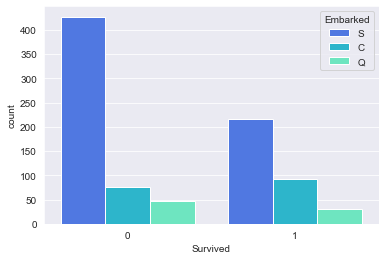

In [19]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = train)

##### From those who did not survive, maximum had boarded from Southampton. Also, we saw earlier that maximum number of passengers had anyway boarded from Southampton. Add to this the fact that maximum number of survivors had also boarded from this port. However, the number of passengers who did not survive is much greater, so we will consider this column while training our model. Also, remember that this column has two rows with missing values. We will address that shortly

#### What impact does SibSp have on Survival?

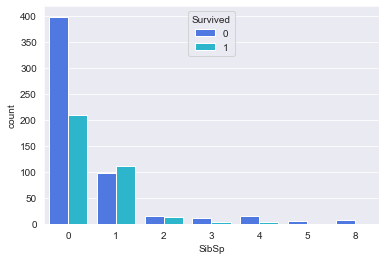

In [20]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = train)

##### From those who did not survive, maximum had no siblings or spouse on board (close to 400). We will retain this column for training our model

#### What impact does Parch have on Survival?

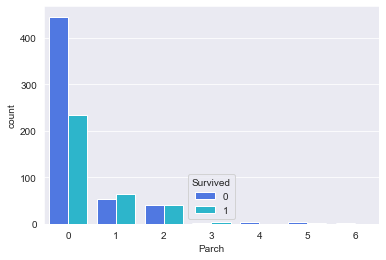

In [21]:
sns.countplot(x = 'Parch', hue = 'Survived', data = train)

##### Again, from those who did not survive, maximum had no parents or children on board (450+). We will retain this column for training our model

##### Note: The SibSp and Parch columns are interesting in the way that both can be combined to form a new column called 'Family Size'. This new column could have either a 'Yes' or a 'No' to indicate whether a passenger who survived had a family or not. This looks like a good way to enhance the dataset and have better results with our model, but we will probably do this in a separate notebook. For now, we consider the SibSp and Parch columns

#### Let's re-visualize the null / missing values in our dataset

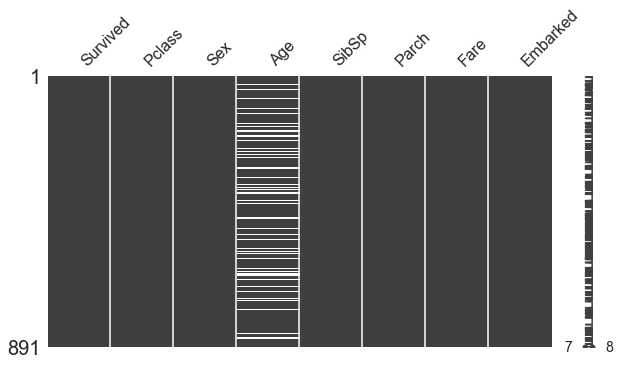

In [22]:
mns.matrix(train, figsize = (10, 5))

In [23]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### What would be a good way to fill values in the Age column? Since it is a numerical value, we could fill empty cells with the Mean (average) or Median of the existing values. But this is not always a good idea. We should explore other options as well

#### Let's visualize age distribution amongst the passenger classes

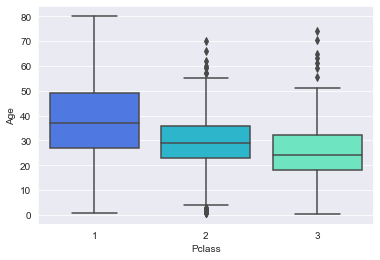

In [24]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

#### What do we have? Average age of Class 1 passengers is 37, Class 2 is 29 and Class 3 is 25. We could fill empty cells in the Age column by checking the class that passenger belongs to. Let's create a function to do that

In [25]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        if pclass == 2:
            return 29
        if pclass == 3:
            return 25
    else:
        return age

In [26]:
# Let's fill age values in our dataset using the above function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [27]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### Was this a good way to fill Age values? Not entirely. There were infants on board the titanic who would of course not fit into any of the age groups we assigned above. However, the values we now have (atleast for the missing rows) are much more specific than something generic like a Mean or a Median. This approach enables our model to learn better, in comparision to dealing with only one generic value

#### What about Embarked? It still has two null values. For now, we will delete the two rows from the dataset as that is not going to have a major impact on our predictions

In [28]:
train.dropna(inplace = True)

In [29]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

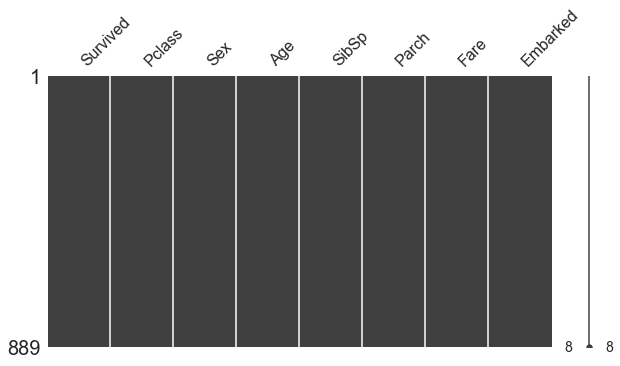

In [30]:
mns.matrix(train, figsize = (10, 5))

#### Great. We have a clean dataset with the columns we require for training our model. We will not go into detailed analysis for the Fare column, but will retain it since it contains numerical values

## Data Encoding

#### We can now begin encoding our data so that it can be used properly by our model. Encoding mainly involves converting Categorical values into numbers. What columns are Categorical in our dataset? Pclass, Sex and Embarked

#### Encode the Pclass values

In [31]:
pclass = pd.get_dummies(train['Pclass'], prefix = 'Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


Three columns for each Class - '1' represents the class a passenger belongs to

In [32]:
sex = pd.get_dummies(train['Sex'], prefix = 'Sex')
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Two columns for each gender - '1' represents the passenger's gender

In [33]:
embark = pd.get_dummies(train['Embarked'], prefix = 'Embarked')
embark.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Three columns - '1' represents the port from where the passenger embarked

#### Let's make a copy of the training dataset. We will work with this copied version for the rest of this notebook

In [34]:
train_copy = train.copy()

In [35]:
train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Append the encoded columns to the dataset

In [36]:
train_copy = pd.concat([train_copy, pclass, sex, embark], axis = 1)
train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


#### Remove the following columns - Pclass, Sex, Embarked. We don't need them since we have their encoded equivalents

In [37]:
train_copy.drop(['Pclass', 'Sex', 'Embarked'], inplace = True, axis = 1)
train_copy.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


## Machine Learning

##### We are now ready to split our data into training (not to be confused with the 'train_copy' set) and test sets, in order to train our models and make predictions

##### Start by first creating two subsets of our data : X & Y

#### X contains all our 'independent' variables or features - Age, SibSp, Parch, Fare, Pclass_1, Pclass_2, Pclass_3, Sex_female, Sex_male, Embarked_C, Embarked_Q, Embarked_S
#### Y contains only 'Survived', our dependent variable - Value we need to predict

In [38]:
X = train_copy.drop('Survived', axis = 1)
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [39]:
Y = train_copy['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Use train_test_split from sklearn to split the data

In [40]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=1)
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
121,25.0,0,0,8.0500,0,0,1,0,1,0,0,1
687,19.0,0,0,10.1708,0,0,1,0,1,0,0,1
790,25.0,0,0,7.7500,0,0,1,0,1,0,1,0
837,25.0,0,0,8.0500,0,0,1,0,1,0,0,1
659,58.0,0,2,113.2750,1,0,0,0,1,1,0,0


In [41]:
X_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
387,36.0,0,0,13.0000,0,1,0,1,0,0,0,1
259,50.0,0,1,26.0000,0,1,0,1,0,0,0,1
771,48.0,0,0,7.8542,0,0,1,0,1,0,0,1
208,16.0,0,0,7.7500,0,0,1,1,0,0,1,0
683,14.0,5,2,46.9000,0,0,1,0,1,0,0,1


### Train & Evaluate the Models

##### Since all our models will be selected from the sklearn toolkit, let's create a function that will return the predictions, regular score and cross-validation score for each model
##### Note: We will use the cross-validation score to compare and select the best performing model for our predictions

In [42]:
def fit_ml_alg(alg, xtrain, ytrain, cv):
    
    # single pass - fit the xtrain and ytrain data onto the model (training)
    model = alg.fit(xtrain, ytrain)
    r_acc = round(model.score(xtrain, ytrain) * 100, 2)
    
    # cross validation
    train_preds = model_selection.cross_val_predict(alg, xtrain, ytrain, cv=cv, n_jobs=-1)
    
    # cross validation accuracy metric
    cv_acc = round(metrics.accuracy_score(ytrain, train_preds) * 100, 2)
    
    print('Accuracy: %s' % r_acc)
    print('CV 10-fold Accuracy: %s' % cv_acc)
    
    return train_preds, r_acc, cv_acc

#### Logistic Regression

In [43]:
log_model = LogisticRegression(max_iter=900)
log_preds, log_acc, log_cv_acc = fit_ml_alg(log_model, X_train, Y_train, 10)

Accuracy: 79.89
CV 10-fold Accuracy: 79.04


#### K-Nearest Neighbors

In [44]:
knn_model = KNeighborsClassifier()
knn_preds, knn_acc, knn_cv_acc = fit_ml_alg(knn_model, X_train, Y_train, 10)

Accuracy: 79.32
CV 10-fold Accuracy: 69.9


#### Gradient Boosting Classifier

In [45]:
gbc_model = GradientBoostingClassifier()
gbc_preds, gbc_acc, gbc_cv_acc = fit_ml_alg(gbc_model, X_train, Y_train, 10)

Accuracy: 90.3
CV 10-fold Accuracy: 82.28


#### Gaussian Naive Bayes

In [46]:
gnb_model = GaussianNB()
gnb_preds, gnb_acc, gnb_cv_acc = fit_ml_alg(gnb_model, X_train, Y_train, 10)

Accuracy: 77.07
CV 10-fold Accuracy: 76.79


#### Linear SVC

In [47]:
svc_model = LinearSVC()
svc_preds, svc_acc, svc_cv_acc = fit_ml_alg(svc_model, X_train, Y_train, 10)

Accuracy: 68.78
CV 10-fold Accuracy: 68.78


#### Random Forest Classifier

In [48]:
rfc_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=7,
                                  criterion='entropy', class_weight='balanced', oob_score=True)
rfc_preds, rfc_acc, rfc_cv_acc = fit_ml_alg(rfc_model, X_train, Y_train, 10)

Accuracy: 94.51
CV 10-fold Accuracy: 80.87


#### Stochastic Gradient Descent

In [49]:
sgd_model = SGDClassifier()
sgd_preds, sgd_acc, sgd_cv_acc = fit_ml_alg(sgd_model, X_train, Y_train, 10)

Accuracy: 70.46
CV 10-fold Accuracy: 71.59


#### Decision Tree Classifier

In [50]:
dtc_model = DecisionTreeClassifier()
dtc_preds, dtc_acc, dtc_cv_acc = fit_ml_alg(dtc_model, X_train, Y_train, 10)

Accuracy: 98.73
CV 10-fold Accuracy: 77.5


#### Create a table with the results, sorted by cross-validation score

In [51]:
models = pd.DataFrame({
    
    'Model' : [
        'Logistic Regression',
        'K-Nearest Neighbors',
        'Gradient Boost',
        'Gaussian Naive Bayes',
        'Linear SVC',
        'Random Forest Classifier',
        'Stochastic Gradient Descent',
        'Decision Tree Classifier'
    ],
    
    'Score' : [
        log_acc,
        knn_acc,
        gbc_acc,
        gnb_acc,
        svc_acc,
        rfc_acc,
        sgd_acc,
        dtc_acc
    ],
    
    'CV Score' : [
        log_cv_acc,
        knn_cv_acc,
        gbc_cv_acc,
        gnb_cv_acc,
        svc_cv_acc,
        rfc_cv_acc,
        sgd_cv_acc,
        dtc_cv_acc
    ]
})
print('---Model Evaluation Metrics---')
models.sort_values(by='CV Score', ascending=False)

---Model Evaluation Metrics---


,Model,Score,CV Score
2,Gradient Boost,90.30,82.28
5,Random Forest Classifier,94.51,80.87
0,Logistic Regression,79.89,79.04
7,Decision Tree Classifier,98.73,77.50
3,Gaussian Naive Bayes,77.07,76.79
6,Stochastic Gradient Descent,70.46,71.59
1,K-Nearest Neighbors,79.32,69.90
4,Linear SVC,68.78,68.78


#### We will pay attention to the CV Score in choosing our model. Cross validation is more reliable since it does multiple passes over the data, instead of one (the regular accuracy score)
#### Since the Gradient Boosting Classifier has the highest CV Score, we will be using it for all next steps

### Feature Importance

#### It's a good idea to evaluate what features were most important for making predictions

In [52]:
def feature_imp(model, data):
    
    f_imp = pd.DataFrame({'Importance' : model.feature_importances_, 'Column' : data.columns})
    
    f_imp = f_imp.sort_values(['Importance', 'Column'], ascending=[True, False]).iloc[-30:]
    
    f_imp.plot(kind='barh', x = 'Column', y = 'Importance', figsize = (20, 10))
    
    return f_imp

##### We will check feature importance for the Gradient Boost Classifer

,Importance,Column
5,0.001836,Pclass_2
10,0.005159,Embarked_Q
9,0.007785,Embarked_C
2,0.010304,Parch
4,0.020463,Pclass_1
11,0.022357,Embarked_S
1,0.062300,SibSp
7,0.099592,Sex_female
6,0.130955,Pclass_3
3,0.153872,Fare


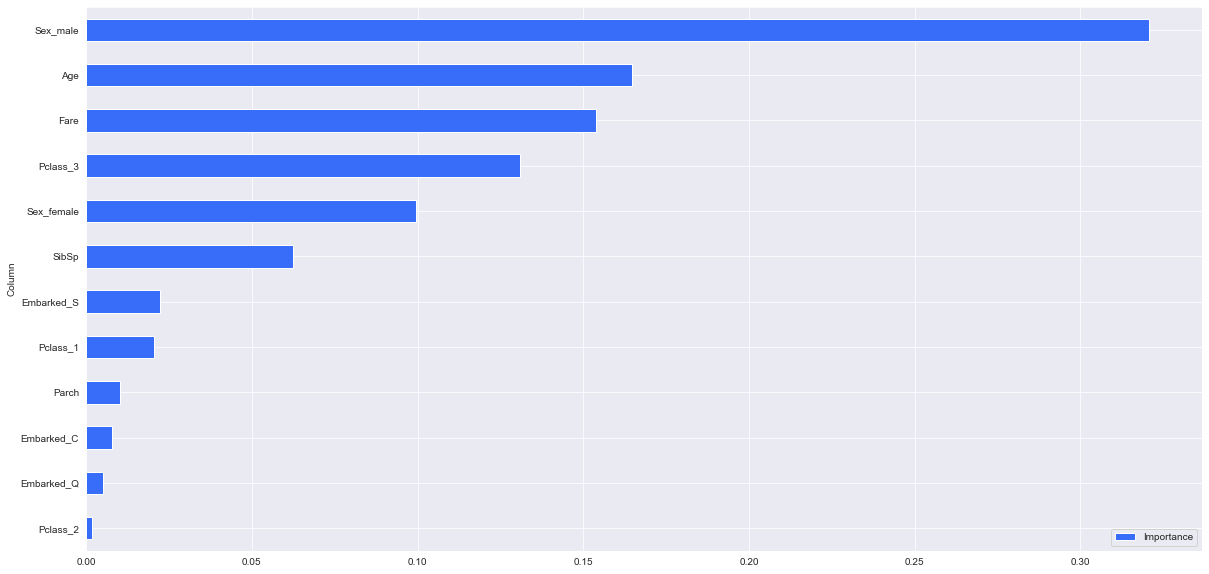

In [53]:
feature_imp(gbc_model, X_train)

#### Why Feature Importance?

##### 1. Feature importance shows how each feature in the dataset contributes to the model
##### 2. It can help you identify features that do not contribute much. Such features can be removed to reduce dimensionality, Or the features can be improved further to see if they could have any impact
##### 3. It shows those who are not familiar with the problem what features of the data are most important for making predictions

### Submission

##### Load the Kaggle Test Dataset. We will use the Gradient Boost Model to make predictions on this data and save those to the final submission file

In [54]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Check Null Values

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Fill age values using the function we had created earlier

In [56]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [57]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Fare column has 1 null value. Let's fill it using Median

In [58]:
test['Fare'].fillna((test['Fare'].median()), inplace = True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Make a copy of this data. We will work with the copy for all next steps

In [60]:
test_copy = test.copy()
test_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Drop columns that are not required
##### NOTE: We need to retain the PassengerId column as it will be copied to the final submission file

In [61]:
test_copy.drop(['Name', 'Ticket', 'Cabin'], inplace = True, axis = 1)
test_copy.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


##### Encode the Categorical columns - Pclass, Sex, Embarked

In [62]:
pclass = pd.get_dummies(test_copy['Pclass'], prefix = 'Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [63]:
sex = pd.get_dummies(test_copy['Sex'], prefix = 'Sex')
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [64]:
embark = pd.get_dummies(test_copy['Embarked'], prefix = 'Embarked')
embark.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [65]:
test_copy = pd.concat([test_copy, pclass, sex, embark], axis = 1)
test_copy.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,0,0,1,0,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,1,1,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,0,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,0,1,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,1,1,0,0,0,1


##### Recall the Columns from the training dataset on which our model was trained. We will use the same columns for the test dataset

In [66]:
test_columns = X_train.columns
test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [67]:
test_copy[test_columns].head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [68]:
test_copy[test_columns].shape

(418, 12)

##### Predict using the Gradient Boost Classifier

In [69]:
final_preds = gbc_model.predict(test_copy[test_columns])
final_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

##### Create Submission

In [70]:
submission = pd.DataFrame()
submission['PassengerId'] = test_copy['PassengerId']
submission['Survived'] = final_preds
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [71]:
submission.to_csv('gbc_gender_submission.csv', index = False)

##### Verify the CSV

In [72]:
gs = pd.read_csv('gbc_gender_submission.csv')
gs.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
